In [23]:
# %matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [13]:
simfilepath = "/nBodyData/mathSim/batch3/batch3*"
alf = [i for i in glob.glob(simfilepath)]
sdf = pd.concat([pd.read_csv(f) for f in alf],sort=False)

# nnfile = "/nBodyData/pred/predicted_paths_3_combined.csv"
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_p", "x2tEnd_p", "x3tEnd_p", "y1tEnd_p", "y2tEnd_p", "y3tEnd_p","eventID"]
pdf = pd.read_csv(nnfile, names=dataCols)
# pdf['eventID'] = pdf['eventID'] + (3*(10**9) + 10**8)

In [14]:
# combine dataframes
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

adf = pd.merge(left=sdf,right=pdf, on='eventID')
mdf = adf.drop_duplicates(subset='eventID')

In [16]:
mdf['baryX'] = (120*mdf['x1tEnd_p'] + 130*mdf['x2tEnd_p'] + 150*mdf['x3tEnd_p'])/(120+130+150)
mdf['baryY'] = (120*mdf['y1tEnd_p'] + 130*mdf['y2tEnd_p'] + 150*mdf['y3tEnd_p'])/(120+130+150)
mdf['ibaryX'] = (120*mdf['x1'] + 130*mdf['x2'] + 150*mdf['x3'])/(120+130+150)
mdf['ibaryY'] = (120*mdf['y1'] + 130*mdf['y2'] + 150*mdf['y3'])/(120+130+150)


<IPython.core.display.Javascript object>


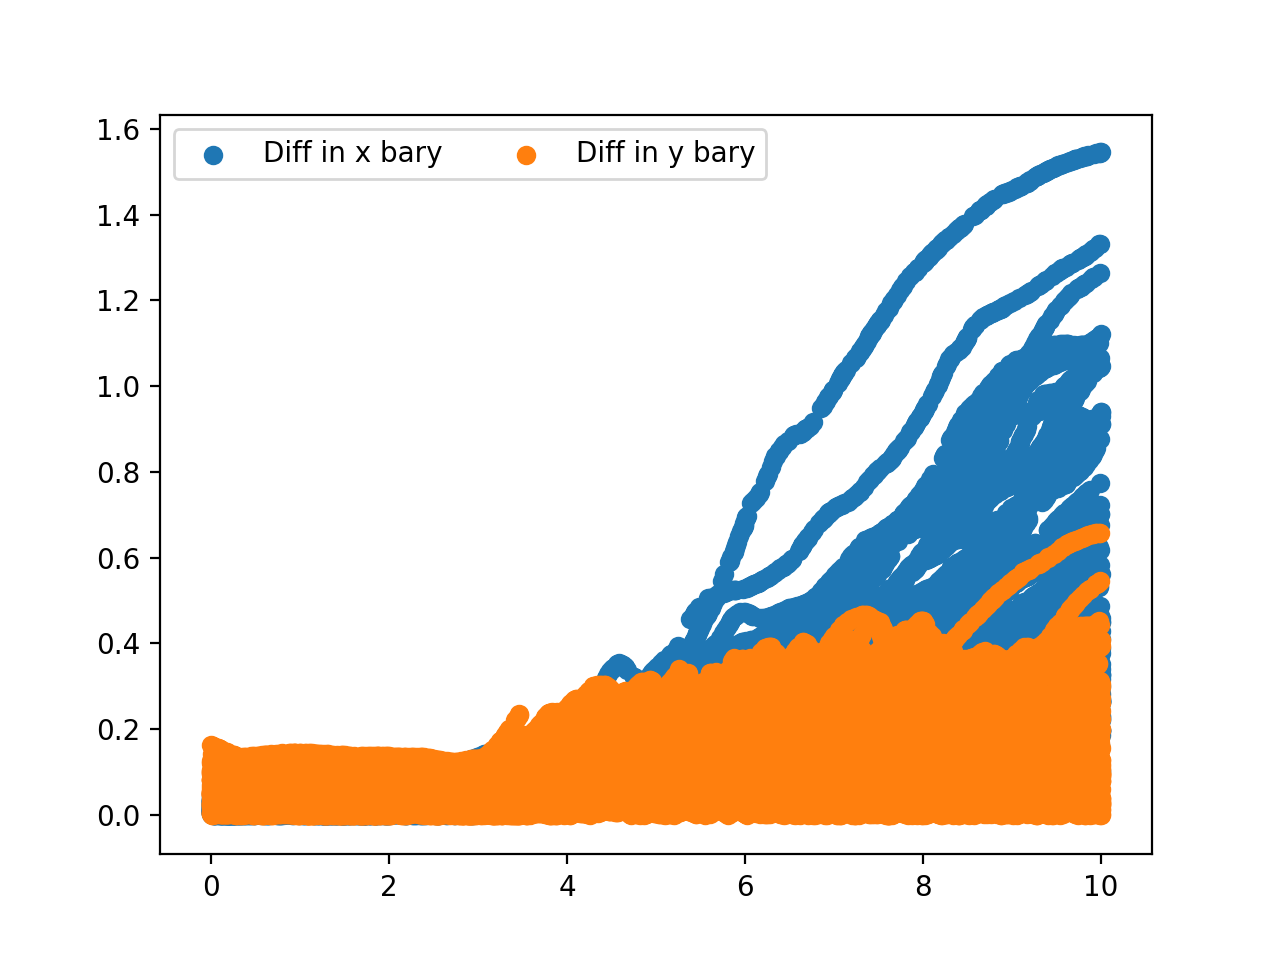

In [24]:
fig, ax = plt.subplots()
ax.scatter(mdf['tEnd'], np.abs(mdf['baryX']-mdf['ibaryX']))
ax.scatter(mdf['tEnd'], np.abs(mdf['baryY']-mdf['ibaryY']))

plt.legend(("Diff in x bary", "Diff in y bary"),loc='best', ncol=2, fancybox=True)
# ax.set_ylim(-1, 4*1e4)